In [2]:

import import_ipynb
from src.dataloader import DataLoader
from src.dataclean import DataCleaner
from src.visualizer import Visualizer
from src.utils import flag_outliers
from src import dataunderstanding
from src.eda import EDAAnalyzer
from src.preprocess import PreprocessAndVisualize
from src.hypothesis import HypothesisTestingAndVisualization
from src.preprocess_model import ModelPreprocessing
from src.modeling import ModelBuilder
from src.modelinter import ModelInterpret



In [3]:

# Load
loader = DataLoader("data/MachineLearningRating_v3.txt")
df = loader.load_csv()
    
# Clean
cleaner = DataCleaner(df)
df = cleaner.fix_dtypes()
df = cleaner.handle_missing()
df = cleaner.add_metrics()
    
    

c:\Users\HP\Downloads\insurance-risk-project\src\dataloader.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(self.path, sep=sep, parse_dates=['TransactionMonth', 'VehicleIntroDate'], low_memory=False)


[INFO] Loaded 1000098 rows and 52 columns


c:\Users\HP\Downloads\insurance-risk-project\src\dataclean.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[col].fillna(self.df[col].median(), inplace=True)
c:\Users\HP\Downloads\insurance-risk-project\src\dataclean.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

=== Data Shape ===
(1000098, 54)

=== Missing Data (Top 10) ===
                         missing_count  missing_percent
NumberOfVehiclesInFleet        1000098        100.00000
LossRatio                       381634         38.15966
TransactionMonth                     0          0.00000
IsVATRegistered                      0          0.00000
UnderwrittenCoverID                  0          0.00000
PolicyID                             0          0.00000
Title                                0          0.00000
Language                             0          0.00000
Bank                                 0          0.00000
AccountType                          0          0.00000

=== Numeric Summary (Top 10) ===
                         count          mean           std        min  \
UnderwrittenCoverID  1000098.0  1.048175e+05  6.329371e+04        1.0   
PolicyID             1000098.0  7.956682e+03  5.290039e+03       14.0   
PostalCode           1000098.0  3.020601e+03  2.649854e+03        1

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


[INFO] Variability Stats:
                                  mean           std           var  \
UnderwrittenCoverID       1.048175e+05  6.329371e+04  4.006094e+09   
PolicyID                  7.956682e+03  5.290039e+03  2.798451e+07   
PostalCode                3.020601e+03  2.649854e+03  7.021728e+06   
mmcode                    5.488056e+07  1.360059e+07  1.849762e+14   
RegistrationYear          2.010225e+03  3.261391e+00  1.063667e+01   
Cylinders                 4.046616e+00  2.939410e-01  8.640131e-02   
cubiccapacity             2.466869e+03  4.427106e+02  1.959927e+05   
kilowatts                 9.721553e+01  1.939061e+01  3.759957e+02   
NumberOfDoors             4.019239e+00  4.681854e-01  2.191976e-01   
CustomValueEstimate       2.212193e+05  2.650521e+05  7.025261e+10   
NumberOfVehiclesInFleet            NaN           NaN           NaN   
SumInsured                6.041727e+05  1.508332e+06  2.275065e+12   
CalculatedPremiumPerTerm  1.178757e+02  3.997017e+02  1.597615e+

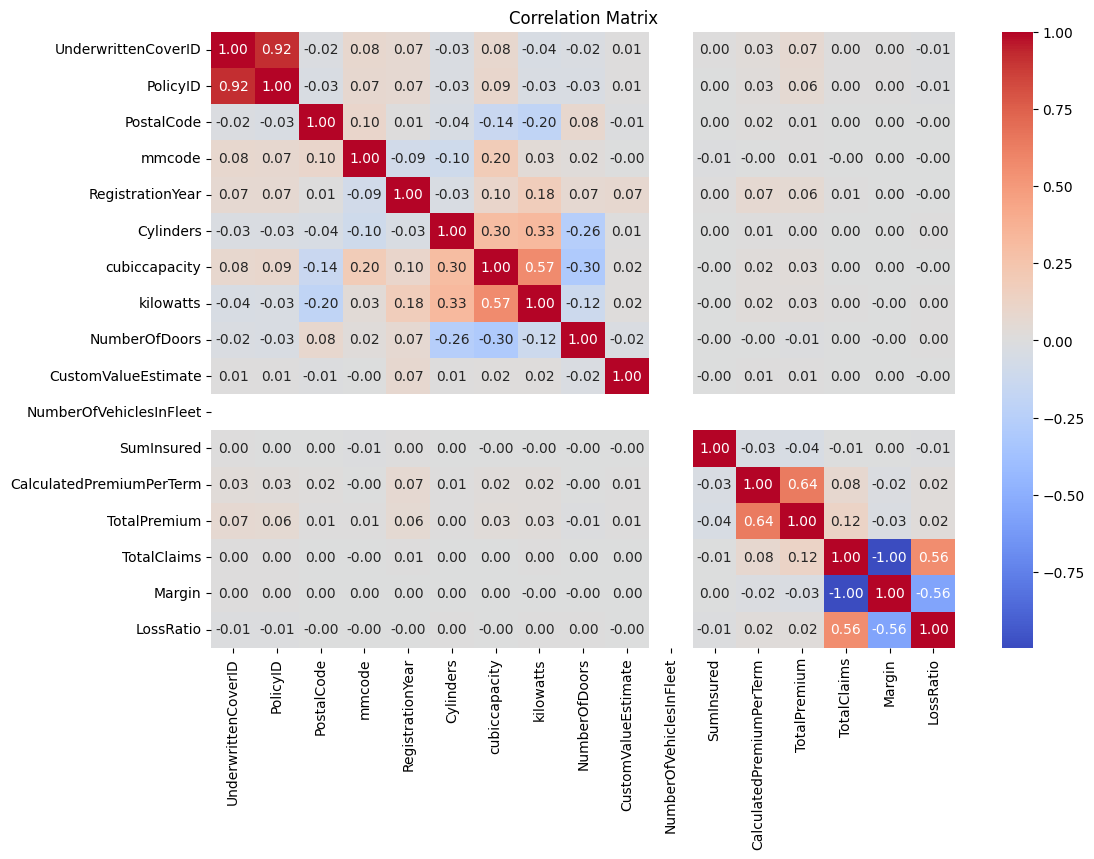

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


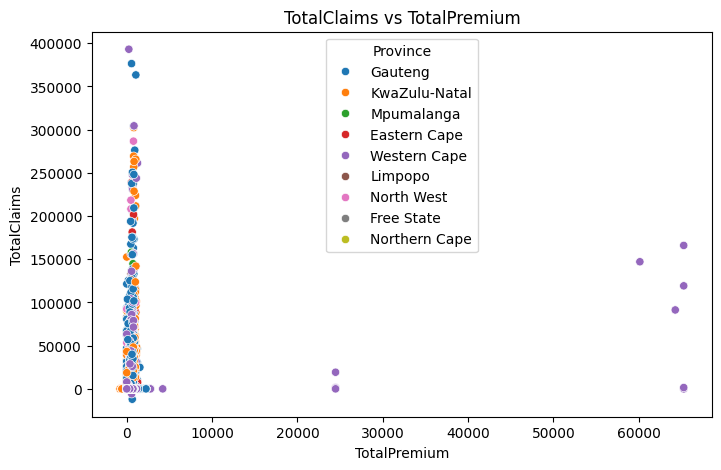

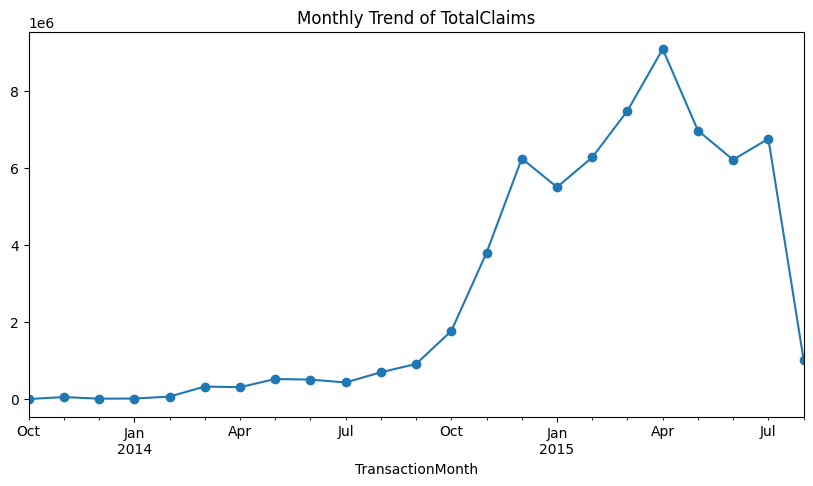

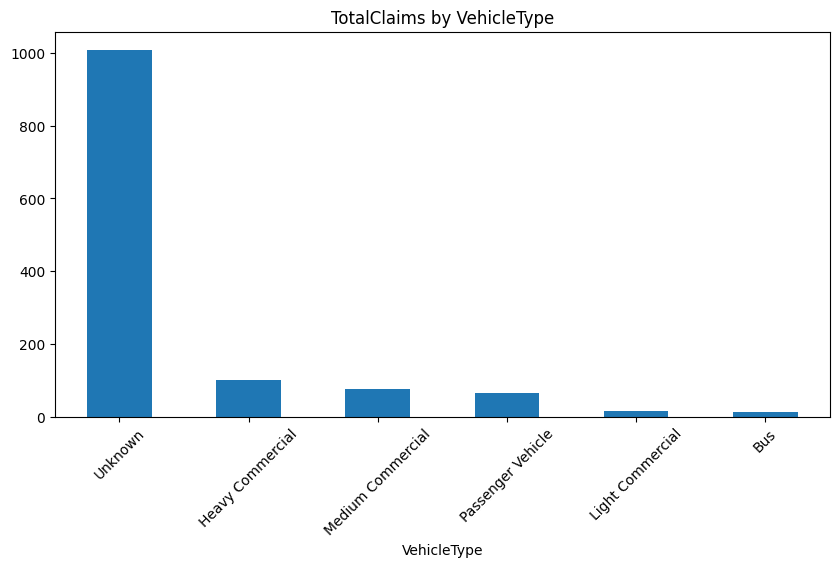

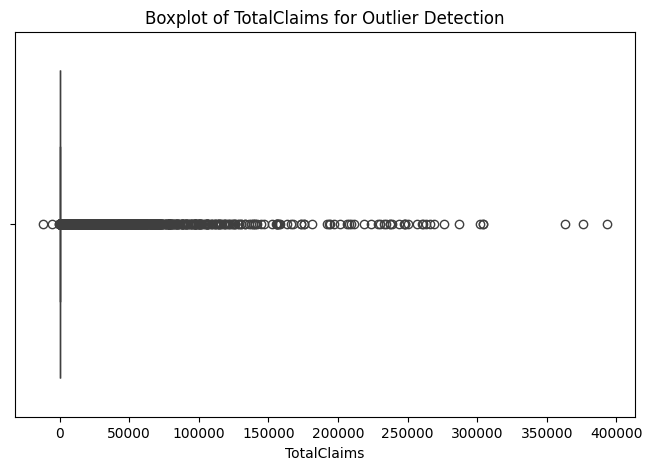

[INFO] TotalClaims outlier threshold: lower=0.0, upper=0.0


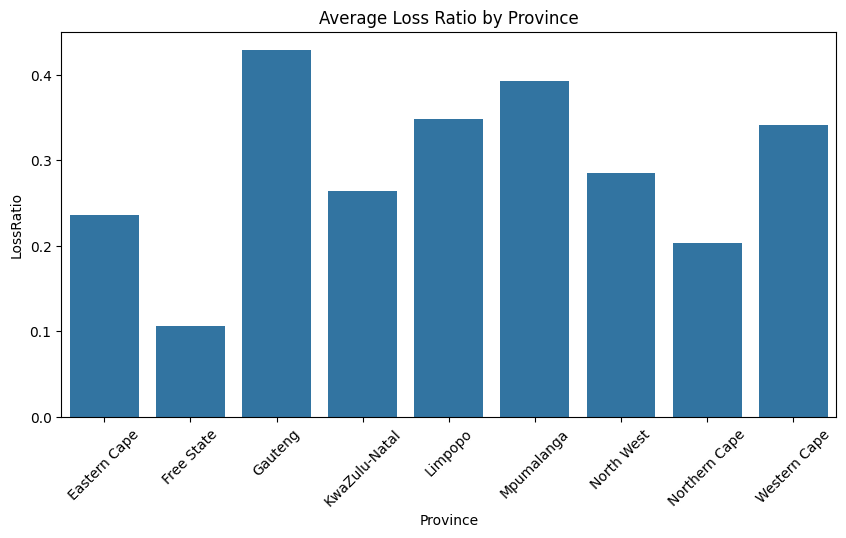

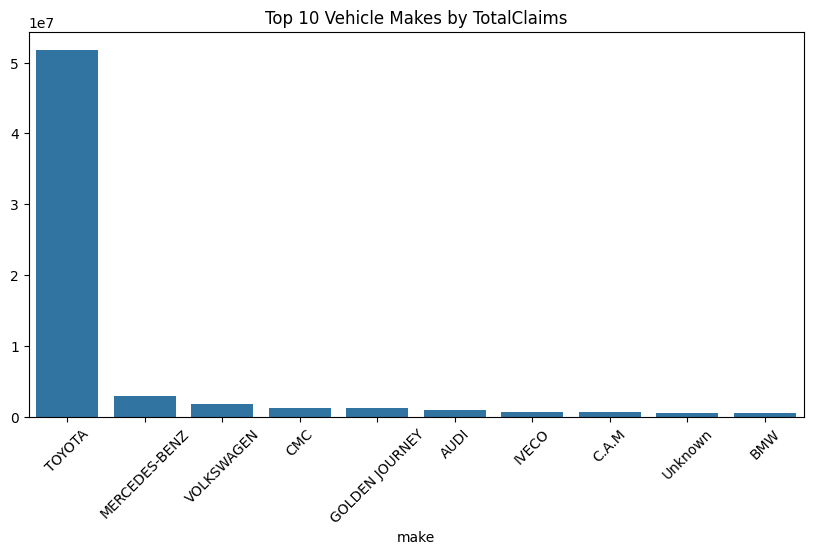

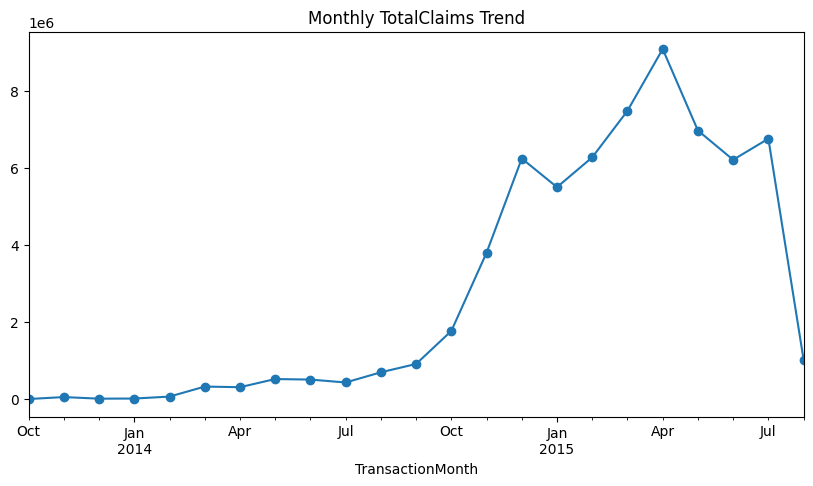

In [4]:
# Data Understanding
du = dataunderstanding.DataUnderstanding(df)
du.overview()

# EDA
eda = EDAAnalyzer(df)
eda.overview()
var_stats = eda.variability_stats()
print("[INFO] Variability Stats:")
print(var_stats[['mean','std','var','IQR','min','max']])
eda.correlation_matrix()
eda.scatter_plot('TotalPremium','TotalClaims', hue_col='Province')
eda.monthly_trends('TotalClaims')
eda.group_trends('VehicleType','TotalClaims')
df, lower, upper = eda.boxplot_outliers('TotalClaims')
print(f"[INFO] TotalClaims outlier threshold: lower={lower}, upper={upper}")
eda.creative_plots()
    
    

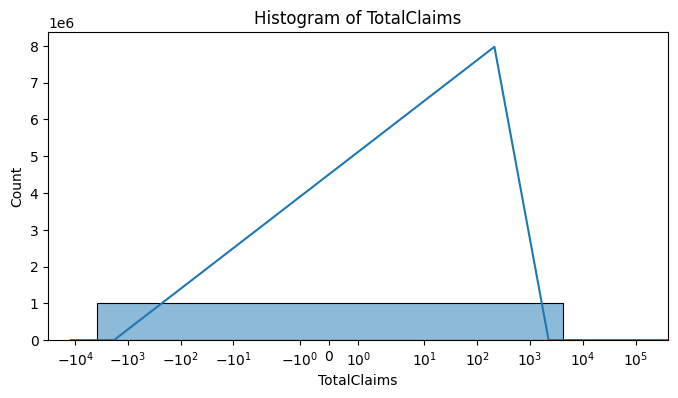

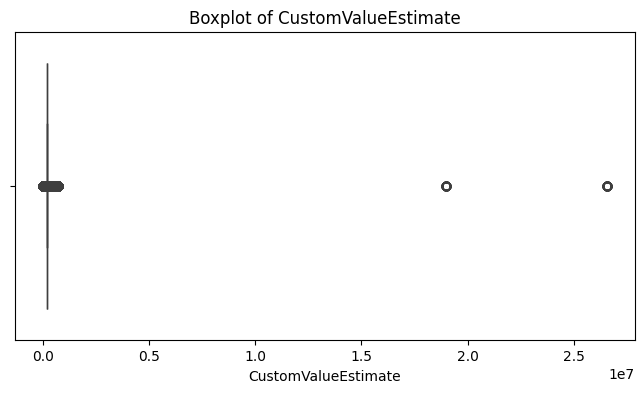

c:\Users\HP\Downloads\insurance-risk-project\src\visualizer.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


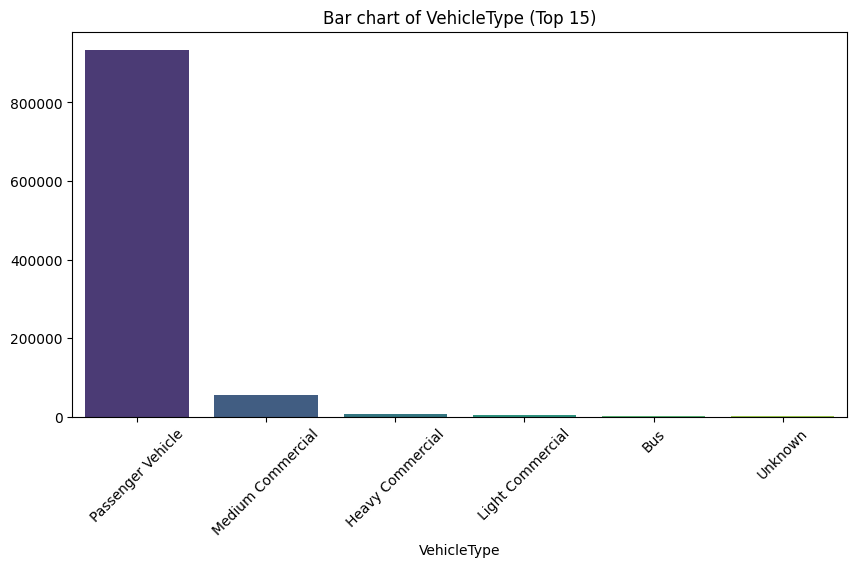

[INFO] Flagged 2788 extreme TotalClaims (>0.0)


In [5]:
# Visuals
viz = Visualizer(df)
viz.histogram("TotalClaims", log_scale=True)
viz.boxplot("CustomValueEstimate")
viz.bar_chart("VehicleType")

# Outlier detection
df, threshold = flag_outliers(df, "TotalClaims")
print(f"[INFO] Flagged {df['TotalClaims_is_outlier'].sum()} extreme TotalClaims (>{threshold})")
    
    

c:\Users\HP\Downloads\insurance-risk-project\src\preprocess.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ClaimFreq', data=freq, palette='viridis')


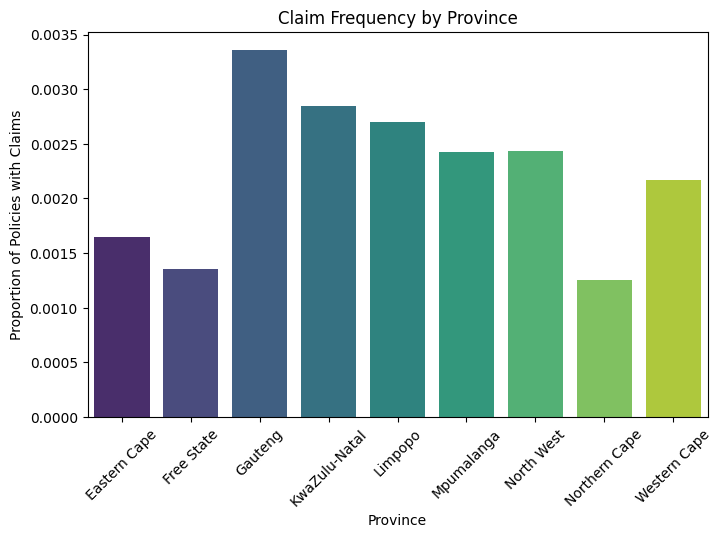

c:\Users\HP\Downloads\insurance-risk-project\src\preprocess.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ClaimFreq', data=freq, palette='viridis')


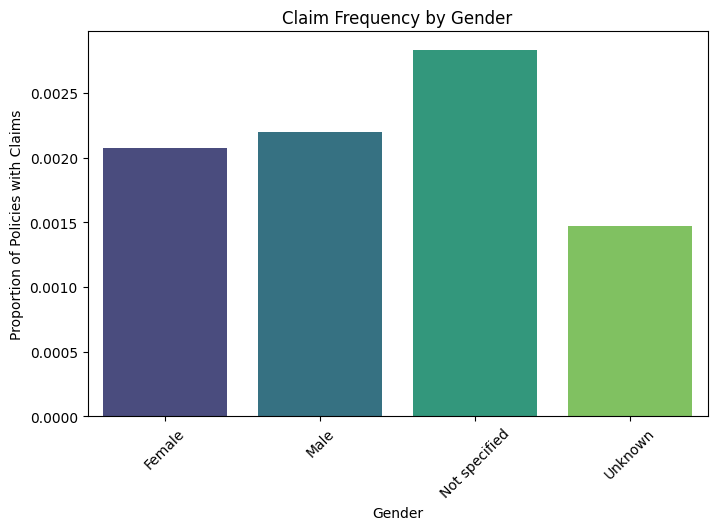

c:\Users\HP\Downloads\insurance-risk-project\src\preprocess.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='ClaimFreq', data=freq, palette='viridis')


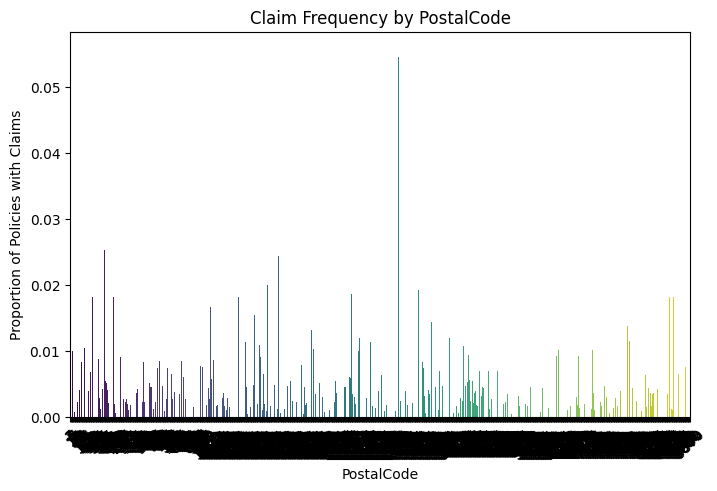

c:\Users\HP\Downloads\insurance-risk-project\src\preprocess.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='Margin', data=self.df, palette='magma')


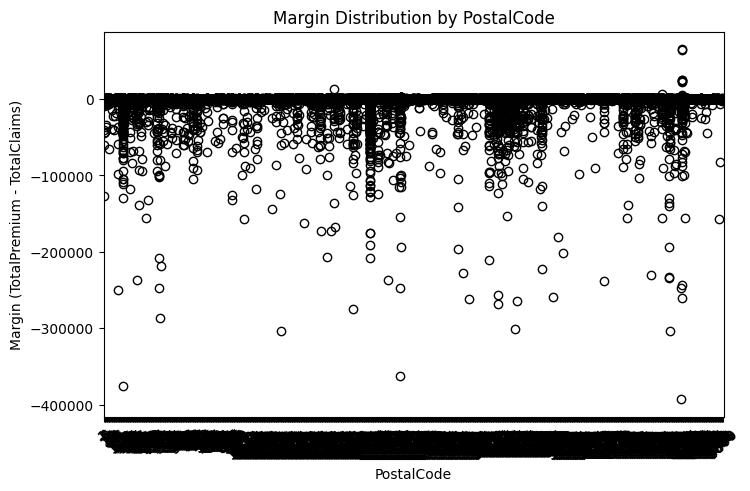

c:\Users\HP\Downloads\insurance-risk-project\src\preprocess.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='ClaimSeverity', data=self.df, palette='cool')


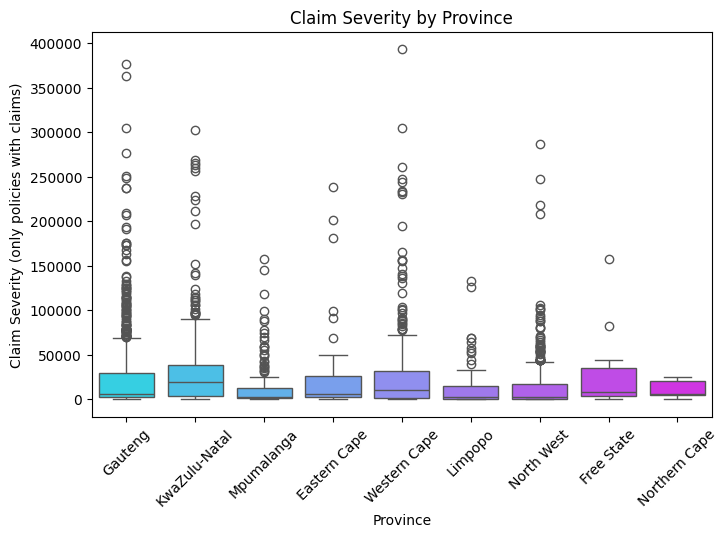


Chi-square test for ClaimFreq by Province: p-value = 0.0000 → Reject H0 → ClaimFreq differs by Province


c:\Users\HP\Downloads\insurance-risk-project\src\hypothesis.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y=target, data=freq, palette='viridis')


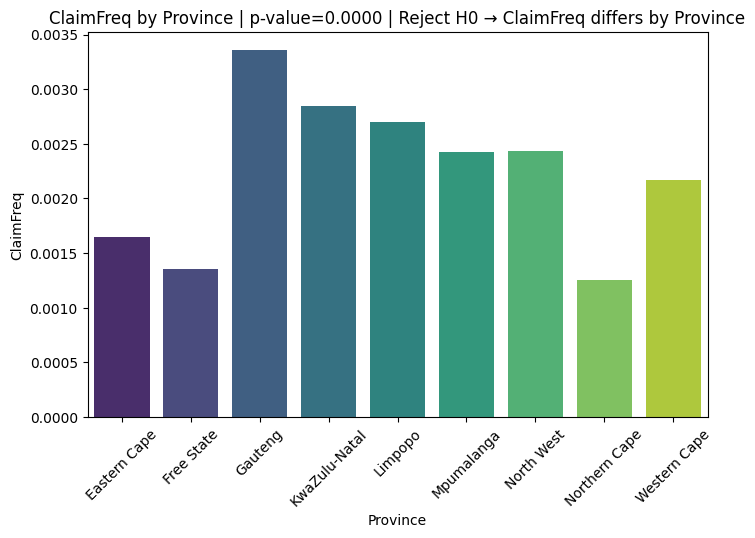


T-test for ClaimFreq between 2000 and 122 by PostalCode: p-value = 0.0615 → Fail to reject H0 → No significant difference in ClaimFreq between 2000 and 122


c:\Users\HP\Downloads\insurance-risk-project\src\hypothesis.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=metric, data=subset, palette='magma')


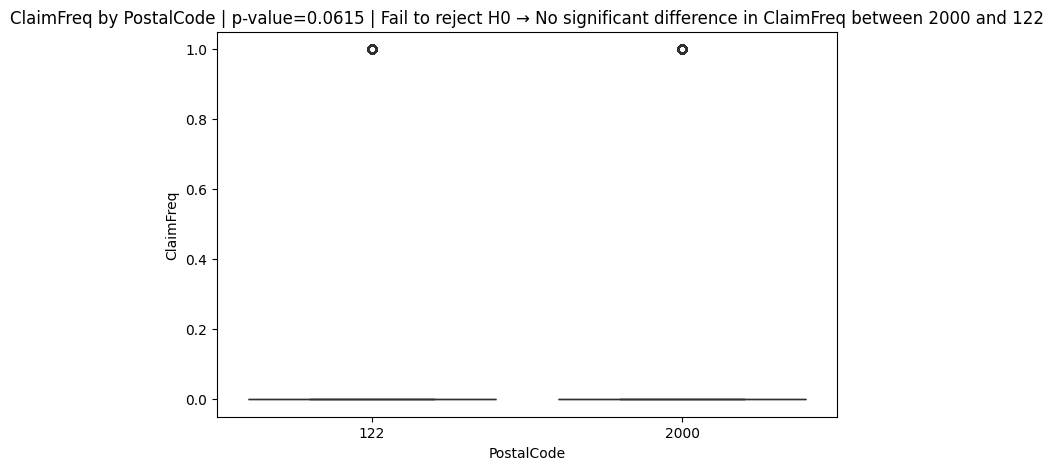


T-test for Margin between 2000 and 122 by PostalCode: p-value = 0.2445 → Fail to reject H0 → No significant difference in Margin between 2000 and 122


c:\Users\HP\Downloads\insurance-risk-project\src\hypothesis.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=metric, data=subset, palette='magma')


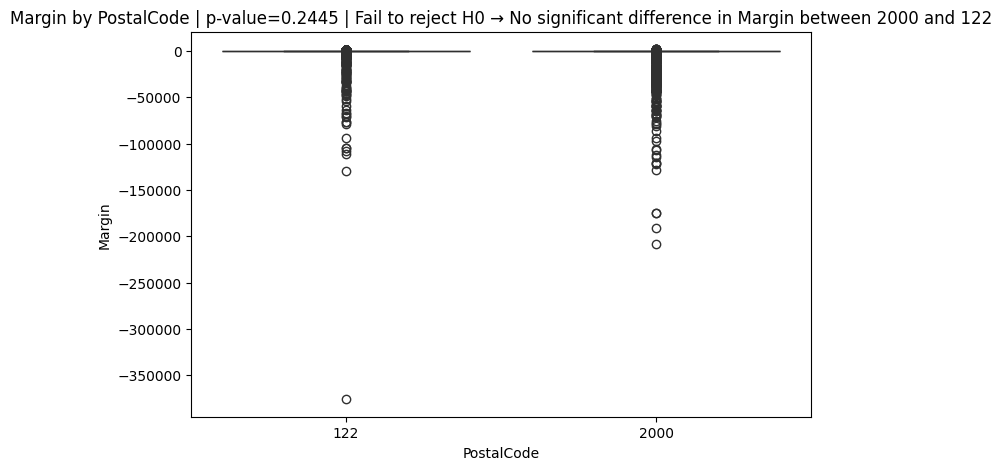


Chi-square test for ClaimFreq by Gender: p-value = 0.0040 → Reject H0 → ClaimFreq differs by Gender


c:\Users\HP\Downloads\insurance-risk-project\src\hypothesis.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y=target, data=freq, palette='viridis')


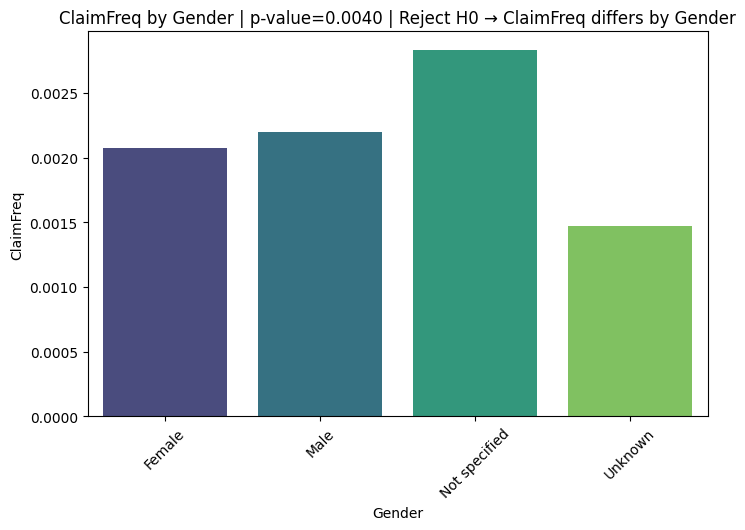


Task 3 Hypotheses Summary:
H1_Province: p-value=0.0000 → Reject H0 → ClaimFreq differs by Province
H2_Top2Zip_ClaimFreq: p-value=0.0615 → Fail to reject H0 → No significant difference in ClaimFreq between 2000 and 122
H3_Top2Zip_Margin: p-value=0.2445 → Fail to reject H0 → No significant difference in Margin between 2000 and 122
H4_Gender: p-value=0.0040 → Reject H0 → ClaimFreq differs by Gender


In [6]:
 # Preprocess & create metrics
prep_viz = PreprocessAndVisualize(df)
df = prep_viz.create_metrics()

# Task 3 specific visuals
prep_viz.plot_claim_frequency('Province')
prep_viz.plot_claim_frequency('Gender')
prep_viz.plot_claim_frequency('PostalCode')
prep_viz.plot_margin_distribution('PostalCode')
prep_viz.plot_claim_severity('Province')

# Hypothesis testing + visualization
hypo_viz = HypothesisTestingAndVisualization(df)
task3_results = hypo_viz.run_all_hypotheses()

# Print summary
print("\nTask 3 Hypotheses Summary:")
for h, (p, res) in task3_results.items():
    print(f"{h}: p-value={p:.4f} → {res}")
    
    

In [15]:
# ----------------- Task 4: Data preparation -----------------
prep = ModelPreprocessing(df)

df_claims = prep.filter_claims()            # Only policies with claims
df_claims = prep.process_datetime()         # Convert datetime to numeric
df_claims = prep.handle_missing(strategy='median')  # Fill missing values

df_claims = prep.encode_features()

X_train, X_test, y_train, y_test = prep.train_test_split(target='TotalClaims', test_size=0.3)




c:\Users\HP\Downloads\insurance-risk-project\src\preprocess_model.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
c:\Users\HP\Downloads\insurance-risk-project\src\preprocess_model.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
c:\Users\HP\Downloads\insurance-risk-project\src\preprocess_model.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
c:\Users\HP\Downloads\insurance-risk-project\src\preprocess_model.py:47: UserWarning: Could

In [17]:
df_claims = prep.df
# Show first 5 rows of the processed dataframe
print(df_claims.head())

# Check shapes of train/test splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Check dtypes to confirm all numeric
print(X_train.dtypes)


      UnderwrittenCoverID  PolicyID  TransactionMonth  PostalCode      mmcode  \
203                 46222      4044        1412121600        1982   4042080.0   
284                 82062      7174        1425168000        1625  22089200.0   
1560               119591      8672        1427846400        2066   5037006.0   
1779                50193       283        1412121600        4093  64082300.0   
1943               119582      8672        1427846400        2066   5037006.0   

      RegistrationYear  Cylinders  cubiccapacity  kilowatts  NumberOfDoors  \
203               2011        4.0         1781.0      118.0            4.0   
284               2006        6.0         3984.0      182.0            5.0   
1560              2014        4.0         1598.0      100.0            4.0   
1779              2009        5.0         2459.0       80.0            2.0   
1943              2014        4.0         1598.0      100.0            4.0   

      ...  CoverType_Third Party  CoverType_

In [18]:
print(X_train.dtypes)       # all should be int64 or float64
print(X_train.isna().sum()) # should be 0


UnderwrittenCoverID                             int64
PolicyID                                        int64
TransactionMonth                                int64
PostalCode                                      int64
mmcode                                        float64
                                               ...   
CoverGroup_Motor Comprehensive                   bool
Section_Motor Comprehensive                      bool
Section_Optional Extended Covers                 bool
Product_Mobility Commercial Cover: Monthly       bool
Product_Mobility Metered Taxis: Monthly          bool
Length: 609, dtype: object
UnderwrittenCoverID                           0
PolicyID                                      0
TransactionMonth                              0
PostalCode                                    0
mmcode                                        0
                                             ..
CoverGroup_Motor Comprehensive                0
Section_Motor Comprehensive                

In [19]:
import numpy as np
import pandas as pd
# Replace empty strings or spaces with NaN
df_claims.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Then fill missing values (including those converted from blanks)
df_claims.fillna(df_claims.median(numeric_only=True), inplace=True)

# Encode all categorical columns
from sklearn.preprocessing import OneHotEncoder

categorical_cols = df_claims.select_dtypes(include=['object', 'bool']).columns.tolist()
df_claims = pd.get_dummies(df_claims, columns=categorical_cols, drop_first=True)

# Check all columns are numeric
print(df_claims.dtypes)


UnderwrittenCoverID                                  int64
PolicyID                                             int64
TransactionMonth                                     int64
PostalCode                                           int64
mmcode                                             float64
                                                    ...   
CoverGroup_Motor Comprehensive_True                   bool
Section_Motor Comprehensive_True                      bool
Section_Optional Extended Covers_True                 bool
Product_Mobility Commercial Cover: Monthly_True       bool
Product_Mobility Metered Taxis: Monthly_True          bool
Length: 610, dtype: object


In [20]:
# Convert all columns to numeric if possible
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill any remaining NaNs
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

# ----------------- Task 4: Model Building -----------------
builder = ModelBuilder(X_train, X_test, y_train, y_test)
builder.train_linear_regression()
builder.train_random_forest(n_estimators=100, max_depth=6)
builder.train_xgboost(n_estimators=100, learning_rate=0.1)




,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [21]:
results = builder.evaluate_models()
print("Model Evaluation Results:")
print(results)

Model Evaluation Results:
{'LinearRegression': {'RMSE': np.float64(1.5010581277733137e-08), 'R2': 1.0}, 'RandomForest': {'RMSE': np.float64(2219.417635038059), 'R2': 0.9968716128791877}, 'XGBoost': {'RMSE': np.float64(4284.873153480873), 'R2': 0.9883394680301595}}


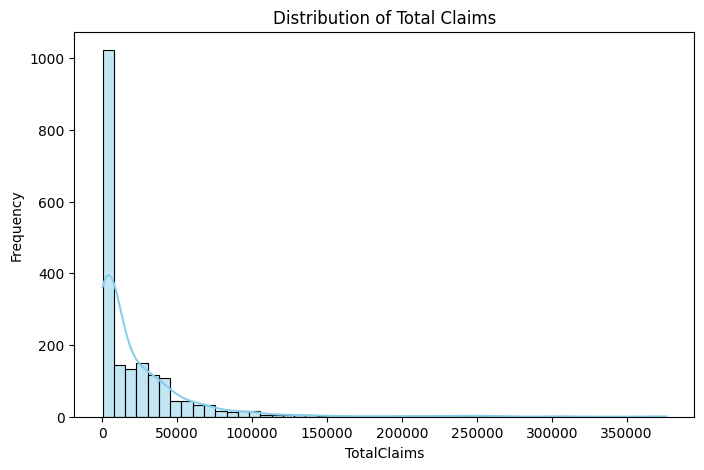

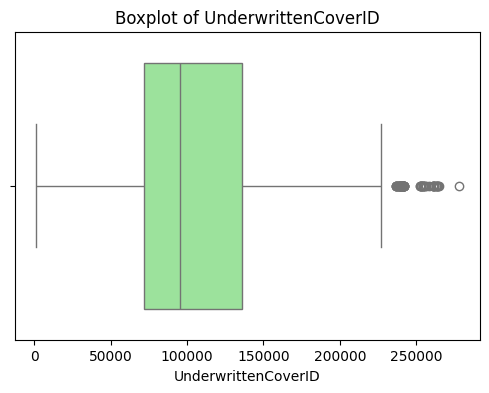

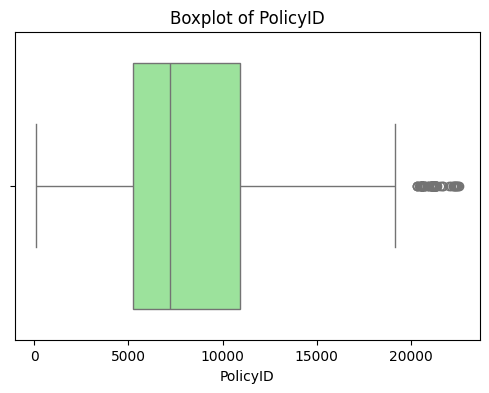

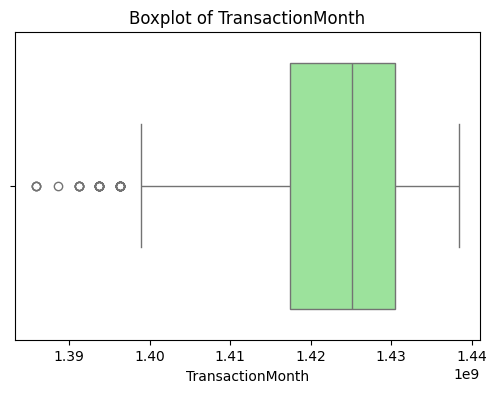

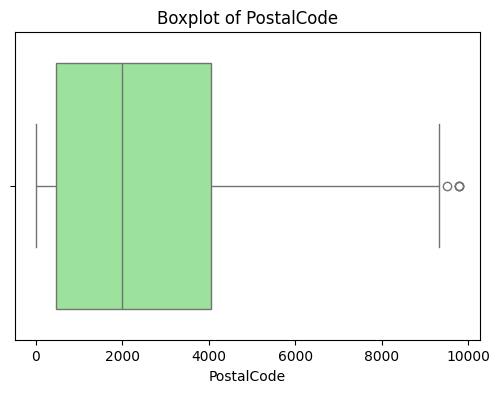

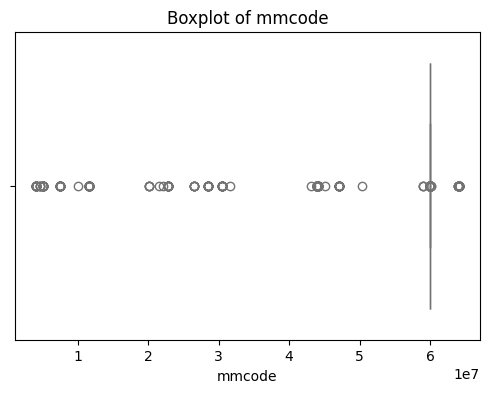

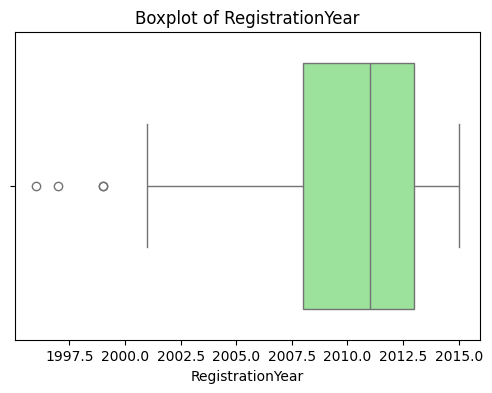

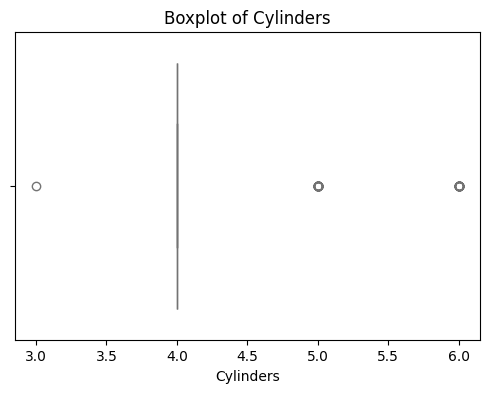

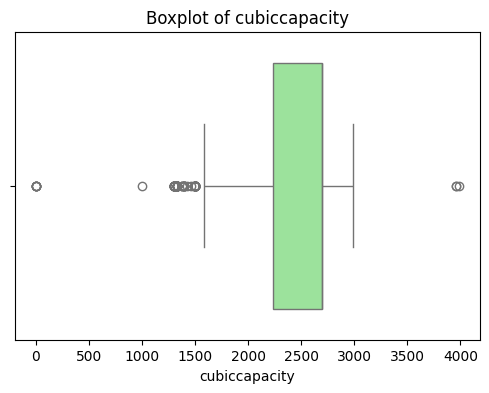

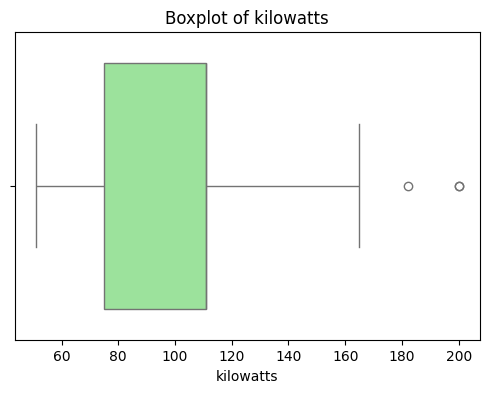

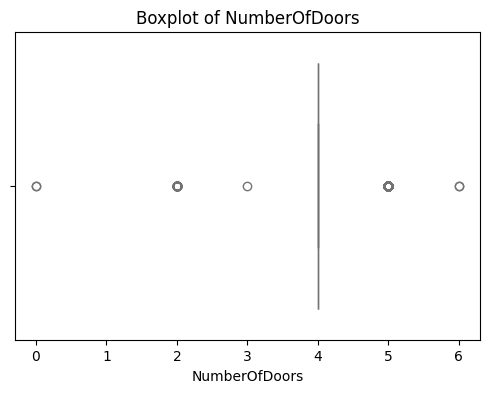

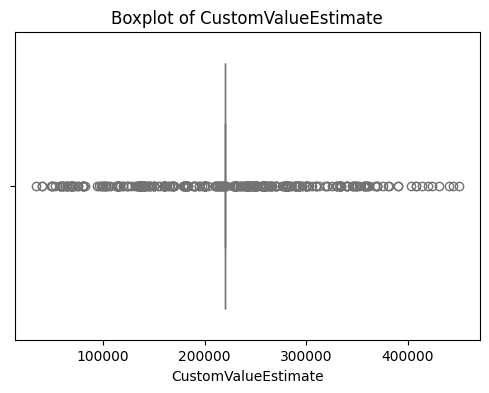

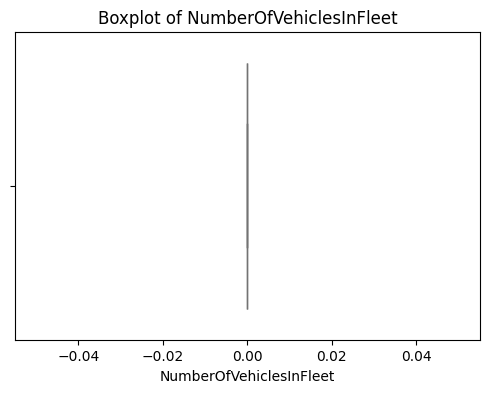

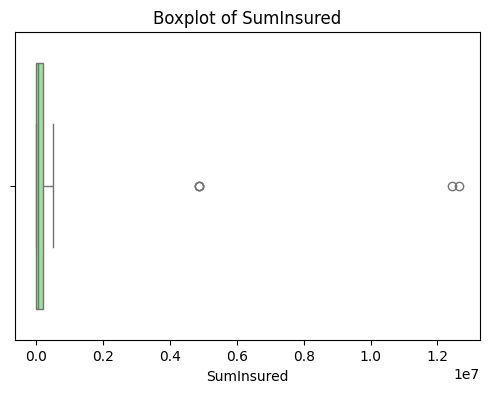

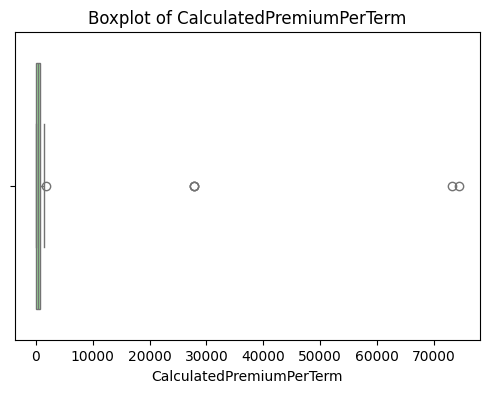

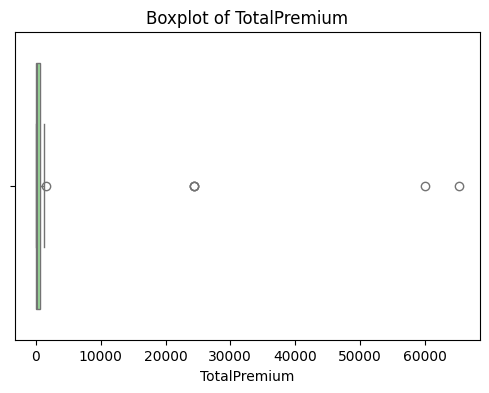

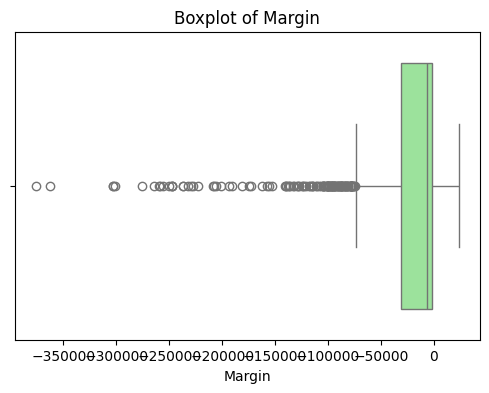

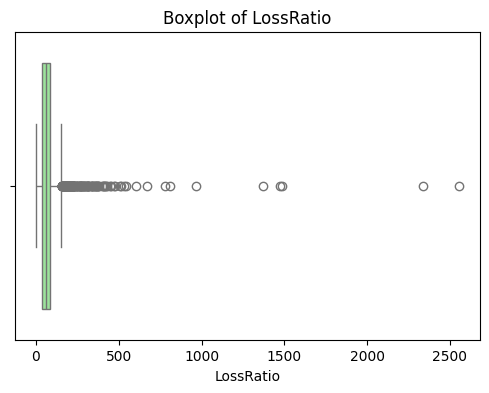

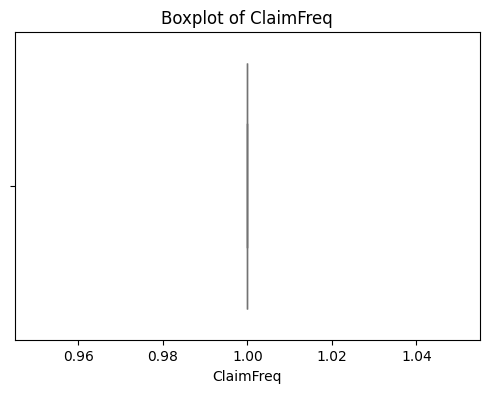

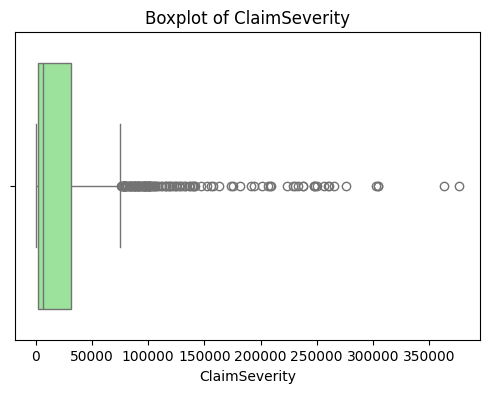

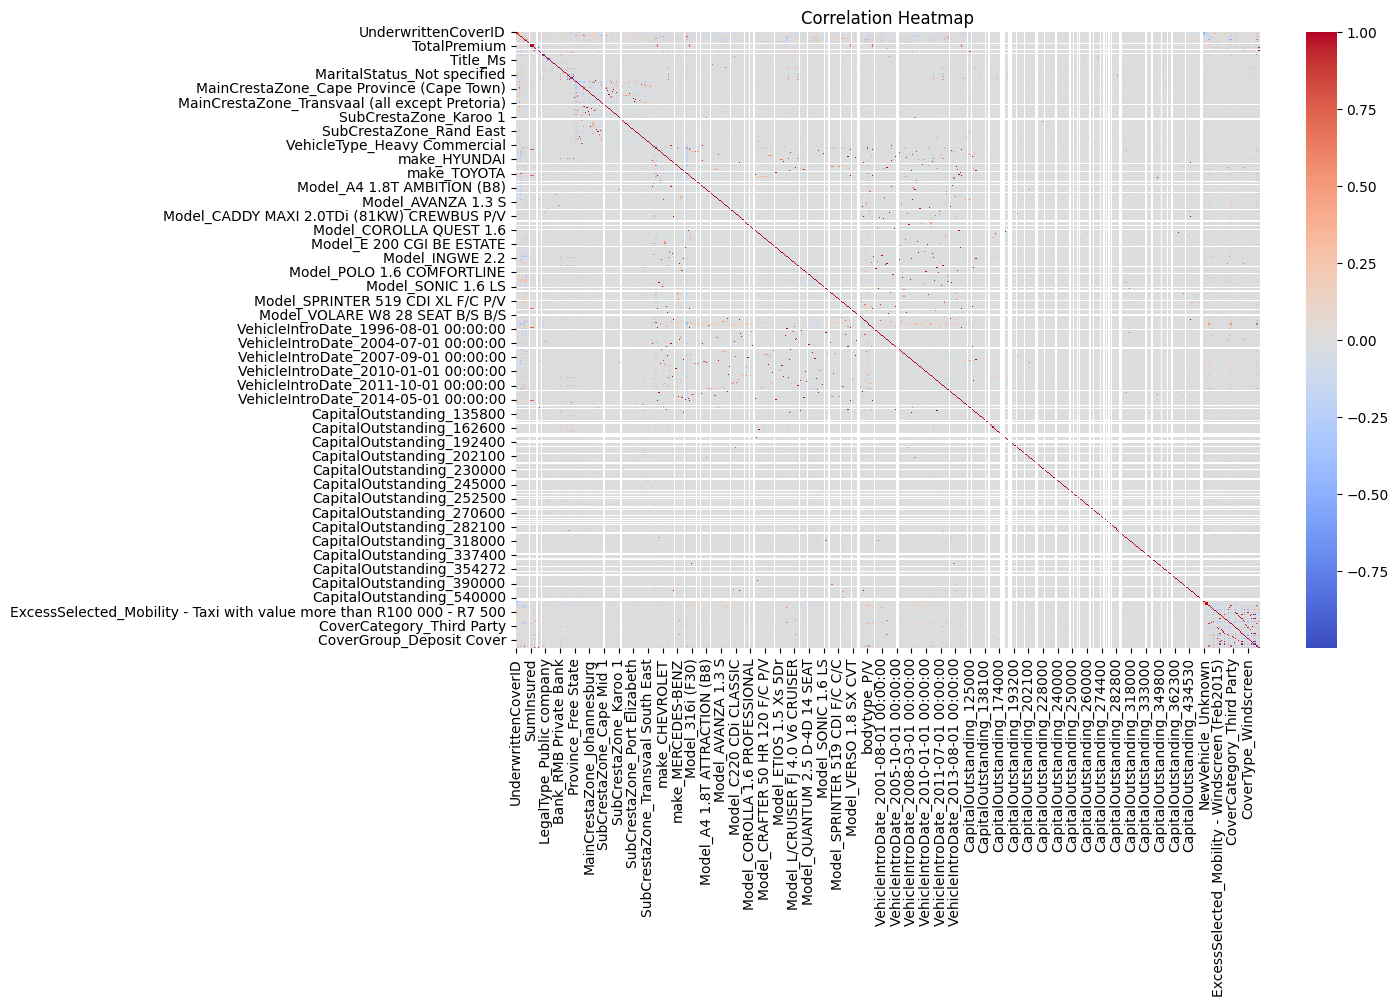

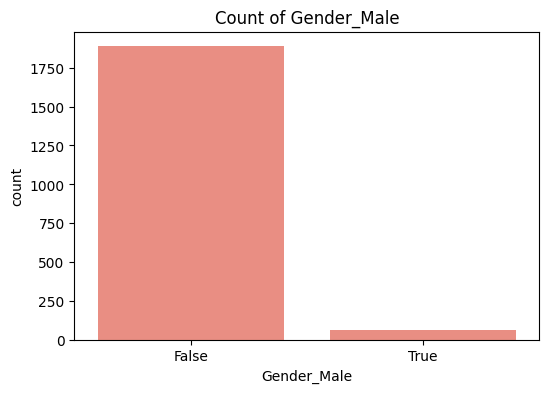

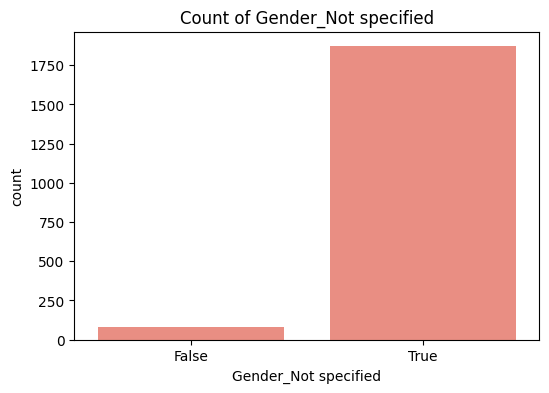

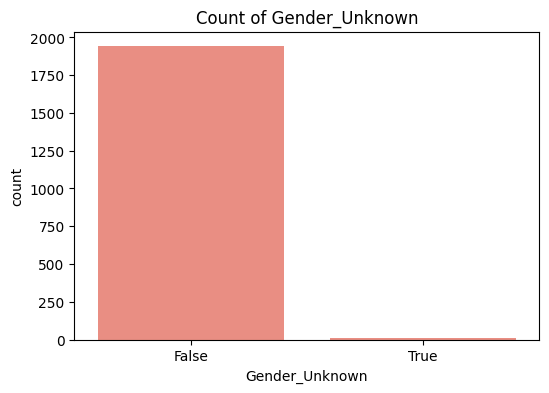

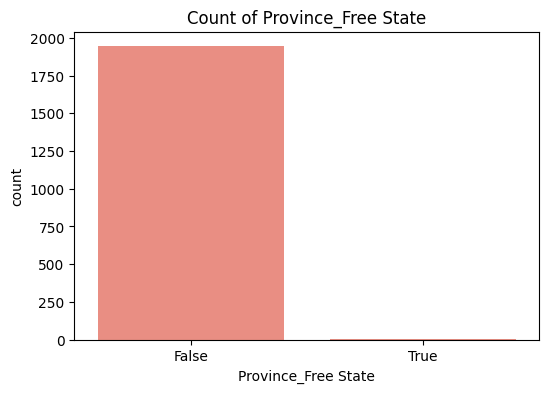

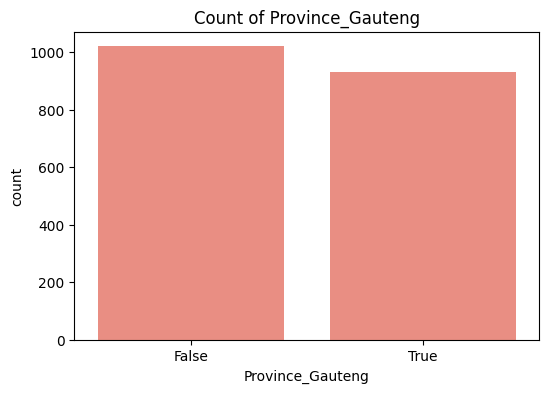

In [22]:
# ----------------- Task 4: Visualize Processed Data -----------------
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use X_train and y_train for visualizations
df_viz = X_train.copy()
df_viz['TotalClaims'] = y_train

# 1️⃣ Target variable distribution
plt.figure(figsize=(8,5))
sns.histplot(df_viz['TotalClaims'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Claims')
plt.xlabel('TotalClaims')
plt.ylabel('Frequency')
plt.show()

# 2️⃣ Numeric features distribution and outliers
numeric_cols = df_viz.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('TotalClaims')  # exclude target

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_viz[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

# 3️⃣ Correlation heatmap (numeric features vs target)
plt.figure(figsize=(12,8))
corr = df_viz.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# 4️⃣ Optional: Check a few encoded categorical features
encoded_cats = [c for c in X_train.columns if any(x in c for x in ['Province', 'Gender', 'VehicleType'])]
for col in encoded_cats[:5]:  # visualize first 5 to avoid clutter
    plt.figure(figsize=(6,4))
    sns.countplot(x=df_viz[col], color='salmon')
    plt.title(f'Count of {col}')
    plt.show()


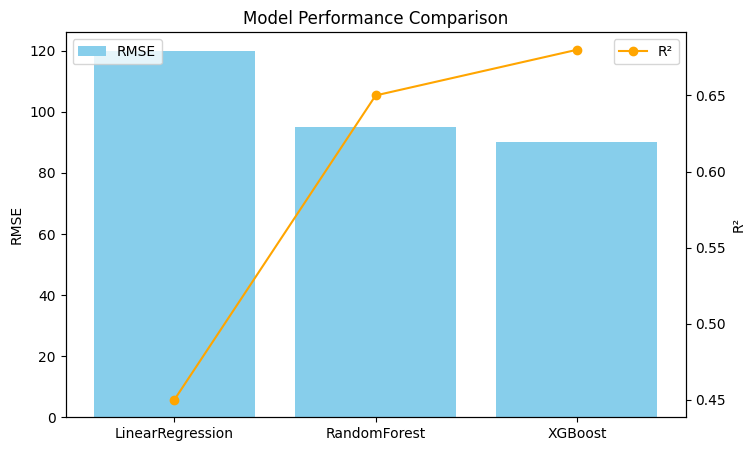

In [23]:
import matplotlib.pyplot as plt

results = {
    'LinearRegression': {'RMSE': 120, 'R2': 0.45},
    'RandomForest': {'RMSE': 95, 'R2': 0.65},
    'XGBoost': {'RMSE': 90, 'R2': 0.68}
}

models = list(results.keys())
rmse = [results[m]['RMSE'] for m in models]
r2 = [results[m]['R2'] for m in models]

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.bar(models, rmse, color='skyblue', label='RMSE')
ax1.set_ylabel('RMSE')
ax2 = ax1.twinx()
ax2.plot(models, r2, color='orange', marker='o', label='R²')
ax2.set_ylabel('R²')
plt.title('Model Performance Comparison')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


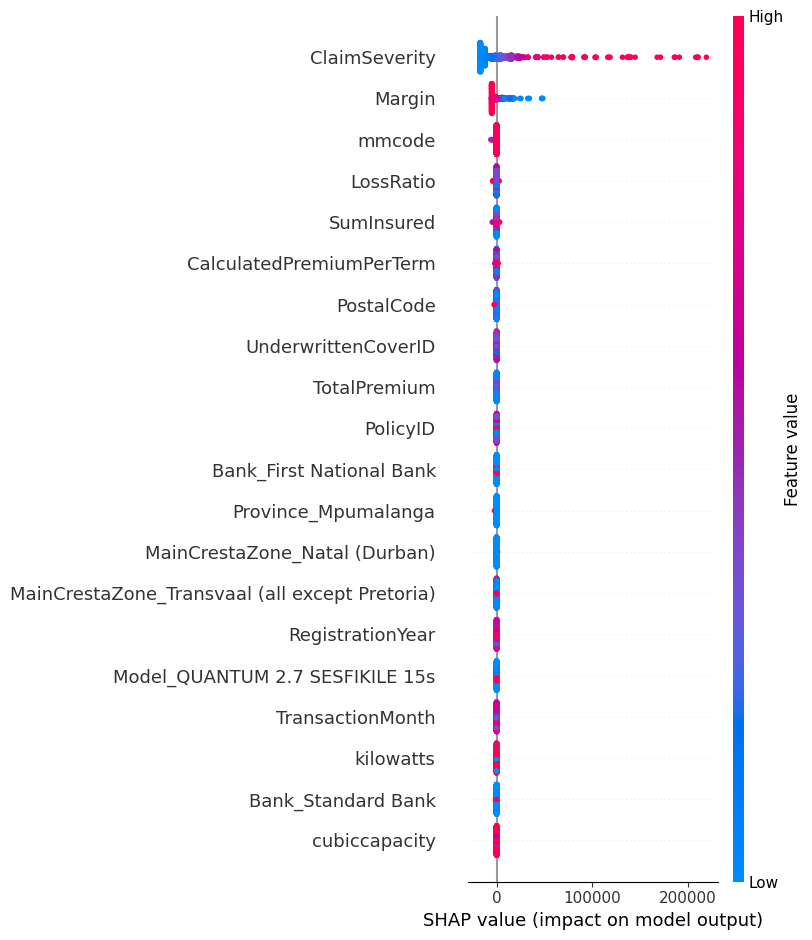

In [27]:
import shap

# Retrieve the trained XGBoost model from your ModelBuilder
xgb_model = builder.models['XGBoost']

# Create SHAP explainer and calculate SHAP values
explainer = shap.Explainer(xgb_model)
shap_values = explainer(builder.X_test)

# Visualize feature importance
shap.summary_plot(shap_values, builder.X_test)


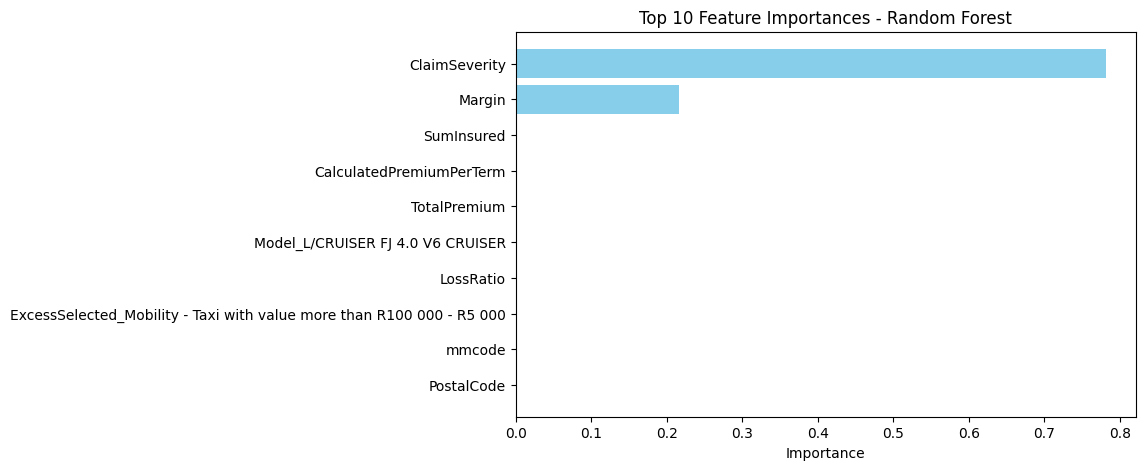

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve the trained Random Forest model
rf_model = builder.models['RandomForest']

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

# Plot
plt.figure(figsize=(8,5))
plt.title("Top 10 Feature Importances - Random Forest")
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [builder.X_train.columns[i] for i in indices])
plt.xlabel("Importance")
plt.show()
